## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mouse_metadata.value_counts("Mouse ID"))

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_df[merge_df.duplicated()]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.drop_duplicates()
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df.value_counts("Mouse ID"))

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_drug_df = cleaned_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean1 = grouped_drug_df["Tumor Volume (mm3)"].mean()
median1 = grouped_drug_df["Tumor Volume (mm3)"].median()
var1 = grouped_drug_df["Tumor Volume (mm3)"].var()
std1 = grouped_drug_df["Tumor Volume (mm3)"].std()
sem1 = grouped_drug_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean1,
                           "Median Tumor Volume (mm3)": median1,
                           "Variance": var1,
                           "Standard Deviation": std1,
                           "SEM": sem1})
summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = grouped_drug_df.agg(Mean_Tumor_Volume = ('Tumor Volume (mm3)','mean'),
                                     Median_Tumor_Volume = ('Tumor Volume (mm3)','median'),
                                     Variance = ('Tumor Volume (mm3)','var'),
                                     Standard_Deviation = ('Tumor Volume (mm3)','std'),
                                     SEM = ('Tumor Volume (mm3)','sem'))
summary_agg_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

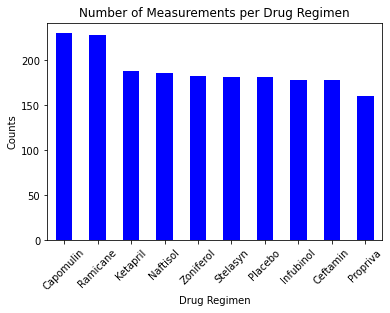

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts = cleaned_df.value_counts("Drug Regimen")
pd_bar = drug_counts.plot(kind='bar', rot=45, color='blue')
pd_bar.set_ylabel("Counts")
pd_bar.set_title("Number of Measurements per Drug Regimen")
plt.show(pd_bar)

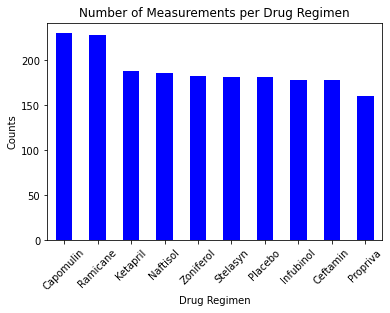

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts, color='b', width=0.5, align="center")
plt.xticks(rotation=45)
plt.xlim(-0.5,9.5)
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")
plt.show()

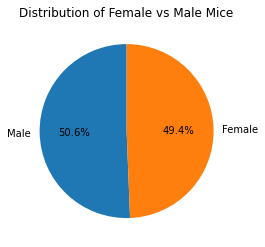

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = cleaned_df.value_counts("Sex")
pd_pie = sex_counts.plot(kind='pie', autopct="%1.1f%%", startangle=90)
pd_pie.set_title("Distribution of Female vs Male Mice")
pd_pie.set_ylabel("")
plt.show(pd_pie)

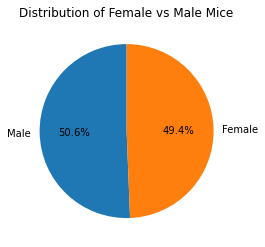

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels = sex_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_df.groupby("Mouse ID").max("Timepoint")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(cleaned_df, max_timepoint_df["Timepoint"], on=["Mouse ID", "Timepoint"])
final_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
